In [2]:
%pip install pandas matplotlib seaborn
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
def join(arr, left, right, l, m, r):
    i = 0
    for i in range(m-l+1):
        arr[i] = left[i]
        i+=1
 
    for j in range(r-m):
        arr[i + j] = right[j]
 
 
# Function to store alternate elements in left
# and right subarray
def split(arr, left, right, l, m, r):
    for i in range(m-l+1):
        left[i] = arr[i * 2]
 
    for i in range(r-m):
        right[i] = arr[i * 2 + 1]
 
 
# Function to generate Worst Case of Merge Sort
def generateWorstCase(arr, l, r):
    if (l < r):
        m = l + (r - l) // 2
 
        # create two auxiliary arrays
        left = [0 for i in range(m - l + 1)]
        right = [0 for i in range(r-m)]
 
        # Store alternate array elements in left
        # and right subarray
        split(arr, left, right, l, m, r)
 
        # Recurse first and second halves
        generateWorstCase(left, l, m)
        generateWorstCase(right, m + 1, r)
        
        # join left and right subarray
        join(arr, left, right, l, m, r)
def swap(arr, i, j):
    temp = arr[i]
    arr[i] = arr[j]
    arr[j] = temp

def generateBestCaseQuick(arr,l,r):
        # Make Binary tree of the array
        # and insert elements accordingly
        if (l < r):
            m = l + (r - l) // 2
            generateBestCaseQuick(arr, l, m)
            generateBestCaseQuick(arr, m + 1, r)
            swap(arr, m, l + (r - m))

# Make Random Unsorted Array and write to file name "input.txt"
def make_random_array(size):
    import random
    with open("input.txt", "w") as f:
        # first line is the size of the array
        f.write(str(size) + "\n")
        # second line is the array that is not sorted 
        new_array = random.sample(range(1, size+1), size)
        f.write(" ".join(map(str, new_array)))

def make_sorted_array(size): 
    with open("input.txt","w") as f: 
        f.write(str(size) + "\n")
        # second line is the array that is sorted reverse
        # new_array = list(range(size,0,-1))
        new_array = range(1,size+1)
        
        f.write(" ".join(map(str, new_array)))
        
def make_revesed_array(size): 
    with open("input.txt","w") as f: 
        f.write(str(size) + "\n")
        # second line is the array that is sorted reverse
        # new_array = list(range(size,0,-1))
        new_array = range(size,0,-1)
        
        f.write(" ".join(map(str, new_array)))
        
def make_worst_merge_array(size):
    with open("input.txt","w") as f: 
        f.write(str(size) + "\n")
        # second line is the array that is sorted reverse
        new_array = list(range(1,size+1))
        generateWorstCase(new_array, 0, size-1)
        f.write(" ".join(map(str, new_array)))
        
def make_best_quick_array(size):
    with open("input.txt","w") as f: 
        f.write(str(size) + "\n")
        # second line is the array that is sorted reverse
        new_array = list(range(1,size+1))
        generateBestCaseQuick(new_array, 0, size-1)
        f.write(" ".join(map(str, new_array)))


In [4]:

        
def testcase_generate(amount): 
    testcase = [1]
    while(testcase[-1]<amount):
        # check if the last element had first digit is 5 then *2 
        if(str(testcase[-1])[0] == '5'):
            testcase.append(testcase[-1]*2)
        else:
            testcase.append((int(str(testcase[-1])[0]) + 1) * 10**(len(str(testcase[-1]))-1))
    return testcase
def testcase_genby2pow(pow):
    testcase = [2**i for i in range(1,pow)]
    return testcase
def testcase_stepby(amount,stepby):
    testcase = [i for i in range(stepby,amount+stepby,stepby)]
    return testcase
# testcase = list(range(100000,10000000,100000))
# print(make_best_quick_array(20))

In [5]:
testcase = list(range(0,10000,200)) +  list(range(10000,100000,500)) + list(range(100000,1000000,10000))
# push testcase 1 
testcase.insert(0,1)
program_lists = ["bubble.c","insertion.c","selection.c"]

def init_result_file():
    with open("result_temp.csv","w") as f:
        f.write("Program,Testcase,Iteration,Round,Time,Type\n")


def compile_program(program_name):
    # Compile the program using GCC
    os.system(f"gcc {program_name} -o {program_name.split('.')[0]}")
    # know the name of the executable file
    # print(f"Executable file name: {program_name.split('.')[0]}")
# Refactor Code To make for the program first then run the test case
init_result_file()
for program in program_lists: 
    # compile the program
    compile_program(program)
    # Run the program with each test case
for test in testcase:
    result = []
    print(f"Running {test} elements")
    # Random Run 2 Times
    for it in range(2):
        for round in range(5):
            make_random_array(test)
            
            for program in program_lists: 
                start = time.time()
                os.system(f"./{program.split('.')[0]}")
                end = time.time()
                # Program,Testcase,Iteration,Time,Type
                result.append([program,test,it,round,end-start,"Random"])
    # Best case 
    make_sorted_array(test)
    for round in range(5):
        # Best Case is sorted array
        for program in program_lists: 
            start = time.time()
            os.system(f"./{program.split('.')[0]}")
            end = time.time()
            # Program,Testcase,Iteration,Time,Type
            result.append([program,test,0,round,end-start,"Sorted"])
        # Worst Case is reverse sorted array
    make_revesed_array(test)
    for round in range(5):
        for program in program_lists: 
            start = time.time()
            os.system(f"./{program.split('.')[0]}")
            end = time.time()
            # Program,Testcase,Iteration,Time,Type
            result.append([program,test,0,round,end-start,"Reverse"])
    # Write result append to file
    with open("result_temp.csv","a") as f:
        for line in result:
            f.write(",".join(map(str,line))+"\n")


Running 1 elements
Running 0 elements
Running 200 elements
Running 400 elements
Running 600 elements
Running 800 elements
Running 1000 elements
Running 1200 elements
Running 1400 elements
Running 1600 elements
Running 1800 elements
Running 2000 elements
Running 2200 elements
Running 2400 elements
Running 2600 elements
Running 2800 elements
Running 3000 elements
Running 3200 elements
Running 3400 elements
Running 3600 elements
Running 3800 elements
Running 4000 elements
Running 4200 elements
Running 4400 elements
Running 4600 elements
Running 4800 elements
Running 5000 elements
Running 5200 elements
Running 5400 elements
Running 5600 elements
Running 5800 elements
Running 6000 elements
Running 6200 elements
Running 6400 elements
Running 6600 elements
Running 6800 elements
Running 7000 elements
Running 7200 elements
Running 7400 elements
Running 7600 elements
Running 7800 elements
Running 8000 elements
Running 8200 elements
Running 8400 elements
Running 8600 elements
Running 8800 element

In [ ]:
print(result)
# read the result array and write to file name "result.csv"
with open("result.csv", "w") as f:
    f.write("Program,Testcase,Iteration,Run,Time,Type\n")
    for i in result:
        f.write(f"{','.join(map(str,i))}\n")

[['bubble.c', 1, 0, 0, 0.00950765609741211, 'Random'], ['insertion.c', 1, 0, 0, 0.008011102676391602, 'Random'], ['selection.c', 1, 0, 0, 0.008510112762451172, 'Random'], ['bubble.c', 1, 0, 1, 0.0065038204193115234, 'Random'], ['insertion.c', 1, 0, 1, 0.005003452301025391, 'Random'], ['selection.c', 1, 0, 1, 0.00650787353515625, 'Random'], ['bubble.c', 1, 0, 2, 0.005999565124511719, 'Random'], ['insertion.c', 1, 0, 2, 0.004507780075073242, 'Random'], ['selection.c', 1, 0, 2, 0.006000041961669922, 'Random'], ['bubble.c', 1, 0, 3, 0.006506204605102539, 'Random'], ['insertion.c', 1, 0, 3, 0.00550389289855957, 'Random'], ['selection.c', 1, 0, 3, 0.0060045719146728516, 'Random'], ['bubble.c', 1, 0, 4, 0.005506038665771484, 'Random'], ['insertion.c', 1, 0, 4, 0.006000995635986328, 'Random'], ['selection.c', 1, 0, 4, 0.005506753921508789, 'Random'], ['bubble.c', 1, 1, 0, 0.005502939224243164, 'Random'], ['insertion.c', 1, 1, 0, 0.006003379821777344, 'Random'], ['selection.c', 1, 1, 0, 0.00550

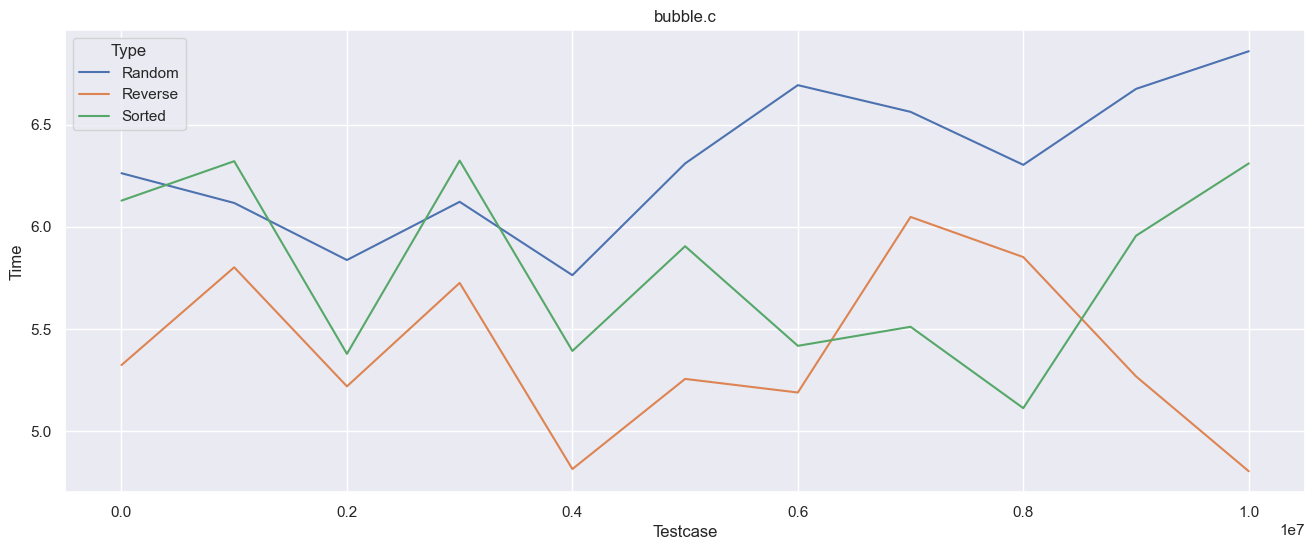

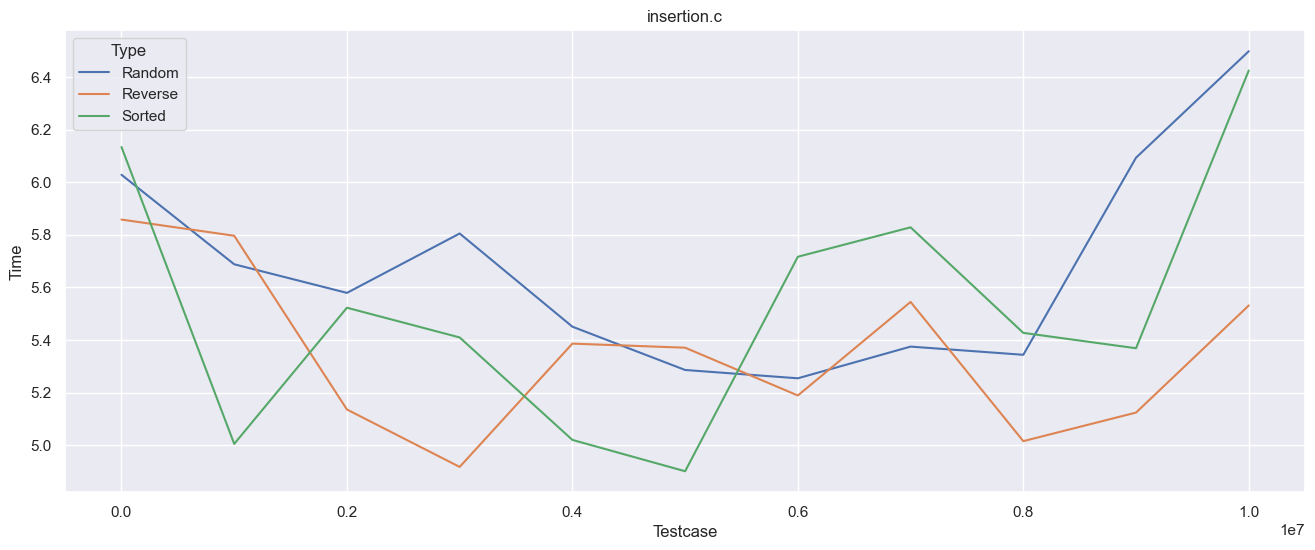

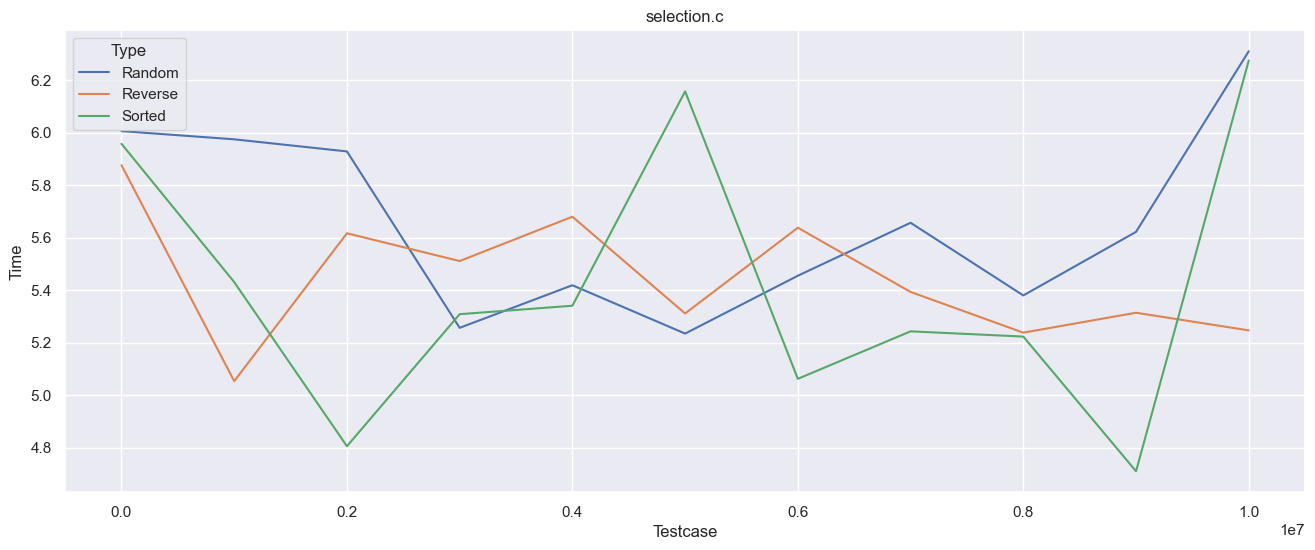

In [ ]:
# read data from file name "result.csv" and plot the graph

df = pd.read_csv("result.csv", dtype={"Testcase": int, "Iteration": int, "Run": int, "Time": float})
df["Time"] = df["Time"] * 1000
# Group by program and testcase
df = df.groupby(["Program", "Testcase", "Type"]).mean().reset_index()

# Plot the graph for each program
program_lists = ["bubble.c","insertion.c","selection.c"]
for program in program_lists:
    df_program = df[df["Program"] == program]
    # size of the figure 16 6
    plt.figure(figsize=(16,6))
    sns.set_theme(style="darkgrid")
    sns.lineplot(data=df_program, x="Testcase", y="Time", hue="Type")
    plt.title(program)
    plt.savefig(f"{program.split('.')[0]}.png")
    plt.show()
    

In [ ]:
df.to_csv("result_bubble.csv", index=False)